# Doctor's Consultation Fees Prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('Final_Train.csv')

In [3]:
print('\n This is how the data looks like \n')
df_train.head(2)


 This is how the data looks like 



,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


+ Numerical Variable columns = 'Experience', 'Rating' and 'Fees' 
+ Categorical Variables columns ='Qualification', 'Place' and 'Profile'
+ Miscelleanous_Info is an alphanumeric column. Extracting any logical data from Micellaneous_Info column is beyond my scope(and that might alter my final result). Nevertheless I shall drop the column-Miscellaneous_Info.

In [4]:
df_test = pd.read_csv('Final_Test.csv')
df_test.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN


In [5]:
df_sub=pd.read_csv('Sample_submission.csv')

In [6]:
str(df_train)

'                       Qualification           Experience Rating  \\\n0              BHMS, MD - Homeopathy  24 years experience   100%   \n1       BAMS, MD - Ayurveda Medicine  12 years experience    98%   \n2     MBBS, MS - Otorhinolaryngology   9 years experience    NaN   \n3                BSc - Zoology, BAMS  12 years experience    NaN   \n4                               BAMS  20 years experience   100%   \n...                              ...                  ...    ...   \n5956                  MBBS, MS - ENT  19 years experience    98%   \n5957                            MBBS  33 years experience    NaN   \n5958                            MBBS  41 years experience    97%   \n5959     MBBS, MD - General Medicine  15 years experience    90%   \n5960         BDS, MDS - Orthodontics  17 years experience   100%   \n\n                              Place           Profile  \\\n0               Kakkanad, Ernakulam         Homeopath   \n1             Whitefield, Bangalore          Ayurve

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
df_train.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [9]:
print('The Train Data has ', df_train.shape[0], 'rows and', df_train.shape[1], 'columns\n')
df_train.dtypes

The Train Data has  5961 rows and 7 columns



Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

+ Predictor Variables = Qualification, Experience, Rating, Place, Profile, Miscellaneous_Info
+ Target Variables = Fees

In [10]:
type(df_train)

pandas.core.frame.DataFrame

### eda

In [11]:
print('Null Values Count : \n')
df_train.isnull().sum()

Null Values Count : 



Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

+ There are null values in the df_train. Rating has the most missing data, followed by Miscellaneous_Info and Place

In [12]:
print('\n Number of unique elements in --')
print('\n Qualification: ', df_train['Qualification'].nunique())
print('\n Place : ', df_train['Place'].nunique())
print('\n Profile : ', df_train['Profile'].nunique())


 Number of unique elements in --

 Qualification:  1420

 Place :  877

 Profile :  6


In [13]:
print('Total Necessary Data = ', len(df_train))
print('Availabel Data = ', df_train['Rating'].isna().sum())
print('Ratio = ', df_train['Rating'].isna().sum()/len(df_train))

Total Necessary Data =  5961
Availabel Data =  3302
Ratio =  0.5539339037074317


In [14]:
print('Total Necessary Data = ', len(df_train))
print('Availabel Data = ', df_train['Miscellaneous_Info'].isna().sum())
print('Ratio = ', df_train['Miscellaneous_Info'].isna().sum()/len(df_train))

Total Necessary Data =  5961
Availabel Data =  2620
Ratio =  0.439523569870827


In [15]:
print('The unique elements of Profile are : \n', df_train['Profile'].unique())

The unique elements of Profile are : 
 ['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']


- There are Qualification 1420, Place 877, and Profile 6 unique levels within variables columns. There is need to do some data cleaning with Qualification' and 'Place'.

In [16]:
def PreProcess(Data):
# Starting with 'Experience' column 
    Data['Experience'] = Data['Experience'].astype(str).str.split(' ').map(lambda x: x[0])
    Data['Experience'] = Data['Experience'].astype(np.int64)
    
# 'Place' column 
# We drop the entire row for null values of 'Place'
    Data = Data.dropna(axis=0, subset=['Place'])
        
# Keeping only the city in 'Place' 
    City = Data['Place'].str.split(', ', n = 1, expand = True)
    Data['Place'] = City[1]
    Data.drop(Data[Data['Place'] == 'Sector 5, Delhi'].index, inplace = True)
    Data.drop(Data[Data['Place'].isna()].index, inplace = True)
    
# Resetting index after row deletion
    Data = Data.reset_index(drop=True)
    
# 'Qualification' column 
    idx = Data.index[Data['Qualification'].str.contains('|'.join(['Fellowship','MRCS','FCGP', 'FRCS', 'FWFO', 'FPFA', 'FICD']))]
    Data['Qualification'][idx] = 'Fellowship'
    idx = Data.index[Data['Qualification'].str.contains('|'.join(['MD', 'M.D','MS','MDS', 'PhD', 'DNB', 'DLO','DDV',
                                                              'DDVL', 'Diploma in Dermatology']))]
    Data['Qualification'][idx] = 'MD'
    idx = Data.index[Data['Qualification'].str.contains('|'.join(['MBBS', '39 years experience']))]
    Data['Qualification'][idx] = 'MBBS'
    idx = Data.index[Data['Qualification'].str.contains('BDS')]
    Data['Qualification'][idx] = 'BDS'
    idx = Data.index[Data['Qualification'].str.contains('|'.join(['BHMS','LCEH', 'GCEH']))]
    Data['Qualification'][idx] = 'BHMS'
    idx = Data.index[Data['Qualification'].str.contains('|'.join(['BAMS', 'BSAM', 'G.A.M.S', 'DAM']))]
    Data['Qualification'][idx] = 'BAMS'
    
# Working on Rating 
#Extracting the integer from the string
    Data['Rating'] = Data.Rating.str.extract('(\d+)')
    
## Fill Nan with -1 and then convert to str and integer
    Data['Rating'] = Data['Rating'].fillna(-1).astype(str).astype(np.float64)
    Data['Rating'] = Data['Rating'].replace(-1, np.nan)
    
# Imputing mean values depending upon 'Qualification' and 'Experience' 
    for qual in list(Data.Qualification.unique()):
        Mean = Data[(Data['Qualification'] == qual) & (Data['Experience'] >= 30)]['Rating'].mean()
        Data.loc[(Data['Qualification'] == qual) & (Data['Experience'] >= 30), 'Rating'] = Mean
        Mean = Data[(Data['Qualification']== qual) & (Data['Experience']>=20) & (Data['Experience']<30)]['Rating'].mean()
        Data.loc[(Data['Qualification']==qual) & (Data['Experience']>=20) & (Data['Experience']<30),'Rating'] = Mean
        Mean = Data[(Data['Qualification'] == qual) & (Data['Experience'] >= 10) & (Data['Experience'] < 20)]['Rating'].mean()
        Data.loc[(Data['Qualification'] == qual) & (Data['Experience'] >= 10) & (Data['Experience'] < 20),'Rating'] = Mean
        Mean = Data[(Data['Qualification'] == qual) & (Data['Experience'] <10)]['Rating'].mean()
        Data.loc[(Data['Qualification'] == qual) & (Data['Experience'] <10),'Rating'] = Mean
# Fill remaining null values, if any, with 0 
    Data['Rating'] = Data['Rating'].fillna(0)
       
    return Data

In [17]:
df=PreProcess(df_train)
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,MD,24,92.903704,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,MD,12,95.099602,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MD,9,96.832099,Bangalore,ENT Specialist,NaN,300
3,MD,12,95.099602,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,MD,20,92.903704,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [18]:
df.describe()

,Experience,Rating,Fees
count,5934.000000,5934.000000,5934.000000
mean,17.373273,94.378185,308.831817
std,11.112833,3.938200,190.880664
min,0.000000,0.000000,5.000000
25%,9.000000,92.903704,150.000000
50%,15.000000,95.099602,300.000000
75%,23.000000,96.832099,500.000000
max,66.000000,98.812500,950.000000


#### Data Cleaning

In [19]:
# Dropping 'Miscellaneous_Info' column 
train_data=df.drop(['Miscellaneous_Info'], axis=1)
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,MD,24,92.903704,Ernakulam,Homeopath,100
1,MD,12,95.099602,Bangalore,Ayurveda,350
2,MD,9,96.832099,Bangalore,ENT Specialist,300
3,MD,12,95.099602,Bangalore,Ayurveda,250
4,MD,20,92.903704,Chennai,Ayurveda,250


#### Data Visualization
+ Visualizing Numerical Variables

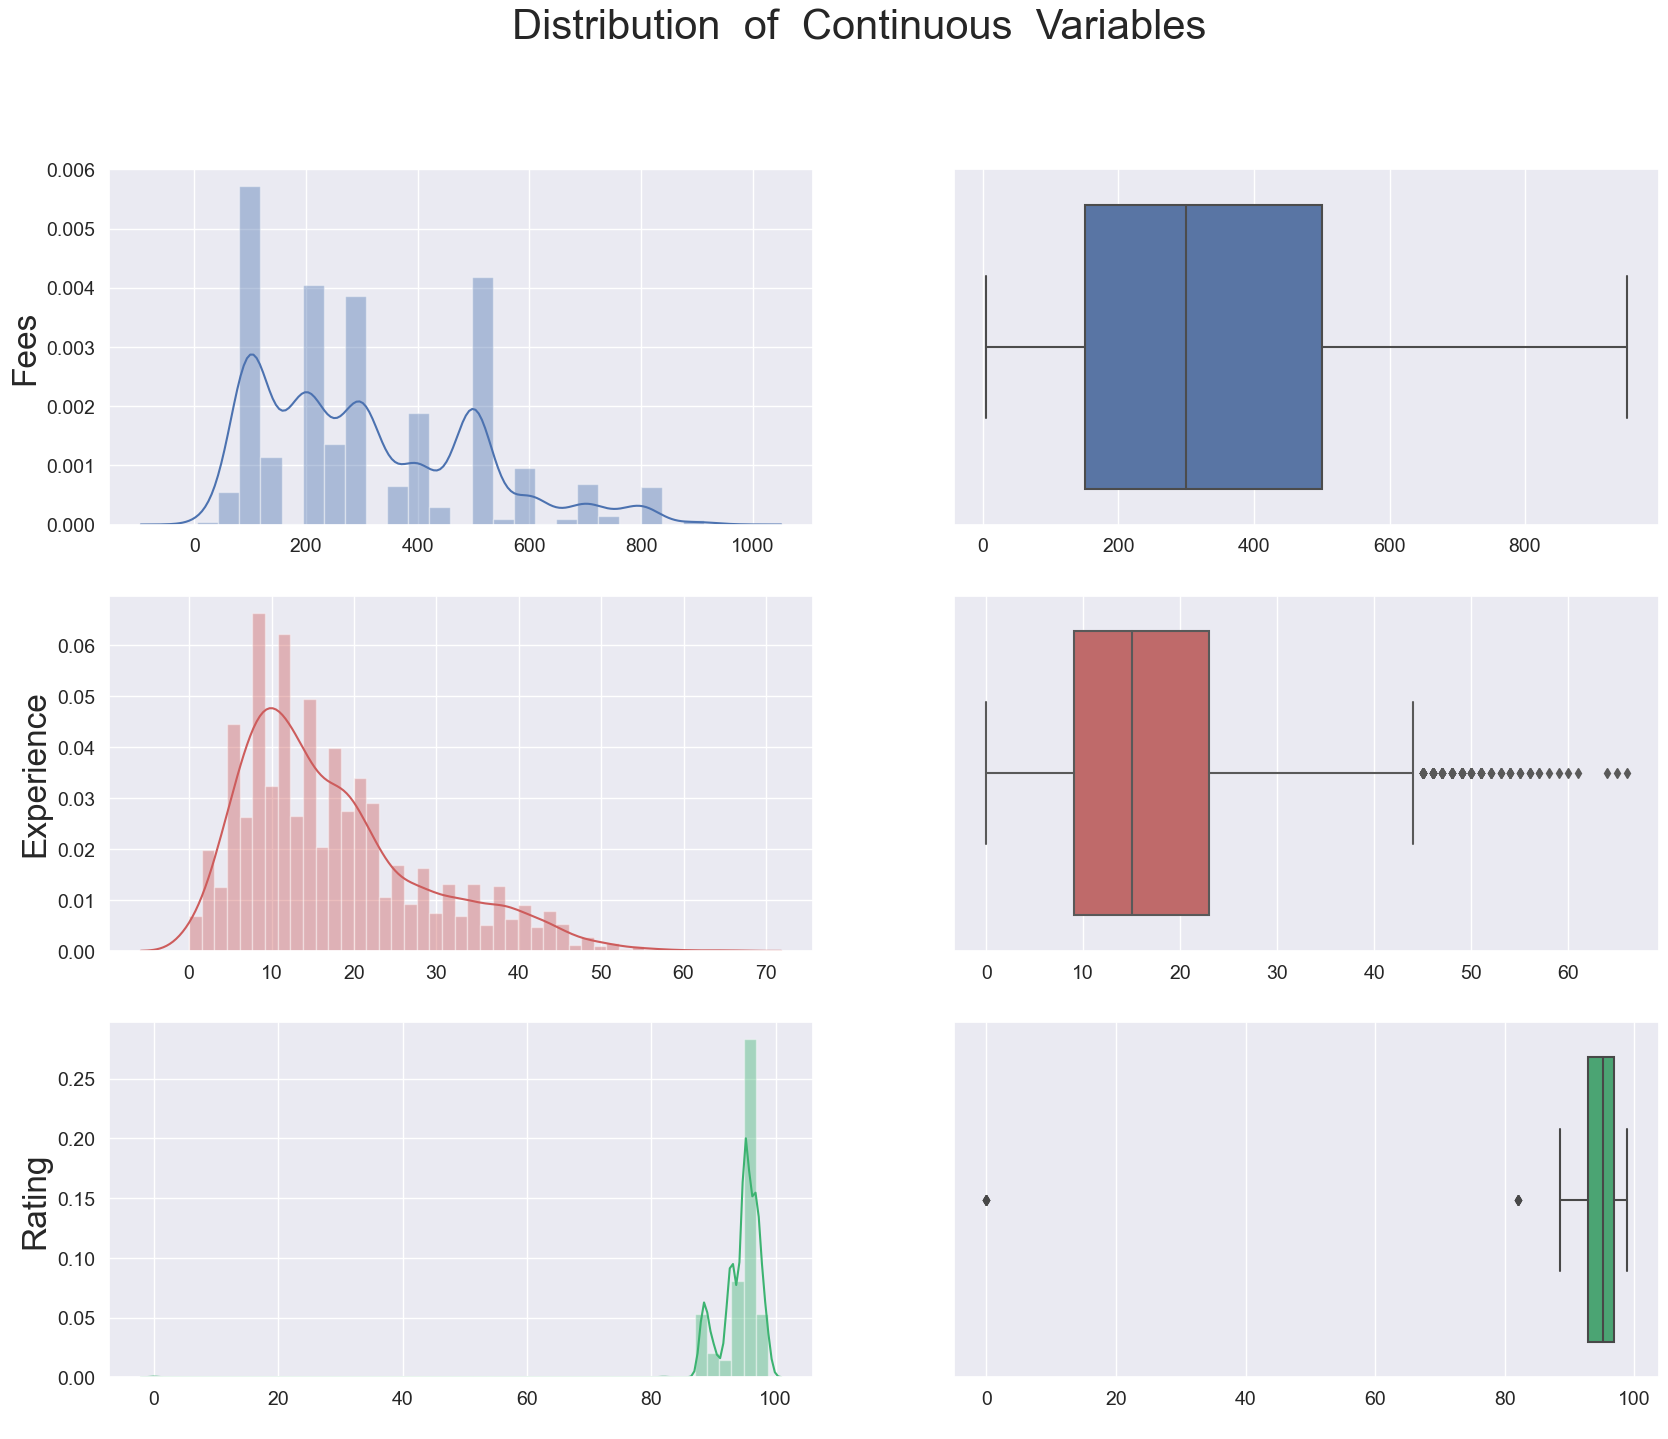

In [20]:
sns.set(context="notebook", color_codes=True)
fig,ax=plt.subplots(nrows=3, ncols=2, dpi=100,figsize=(20,16))

sns.distplot(train_data['Fees'], ax=ax[0,0])
ax[0,0].set_ylabel('Fees', fontsize=24)
ax[0,0].set_xlabel(' ')
ax[0,0].tick_params(axis='both', labelsize=14)

sns.boxplot(train_data['Fees'], ax=ax[0,1])
ax[0,1].set_xlabel(' ')
ax[0,1].tick_params(axis='both', labelsize=14)

sns.distplot(train_data['Experience'], ax=ax[1,0], color = 'indianred')
ax[1,0].set_ylabel('Experience', fontsize =24)
ax[1,0].set_xlabel(' ')
ax[1,0].tick_params(axis='both', labelsize=14)

sns.boxplot(train_data['Experience'], ax=ax[1,1], color = 'indianred')
ax[1,1].set_xlabel(' ')
ax[1,1].tick_params(axis='both', labelsize=14)

sns.distplot(train_data['Rating'], ax=ax[2,0], color = 'mediumseagreen')
ax[2,0].set_ylabel('Rating', fontsize =24)
ax[2,0].set_xlabel(' ')
ax[2,0].tick_params(axis='both', labelsize=14)

sns.boxplot(train_data['Rating'], ax=ax[2,1], color = 'mediumseagreen')
ax[2,1].set_xlabel(' ')
ax[2,1].tick_params(axis='both', labelsize=14)

fig.suptitle('Distribution  of  Continuous  Variables', fontsize=30)


plt.show()

= The feature variable ' Experience' is right skewed and has some outliers.

= Rating ' data is concentrated between 90 and 100. 

= There are no outliers in the target variables 'Fees'

+ Visualizing Categorical Variables

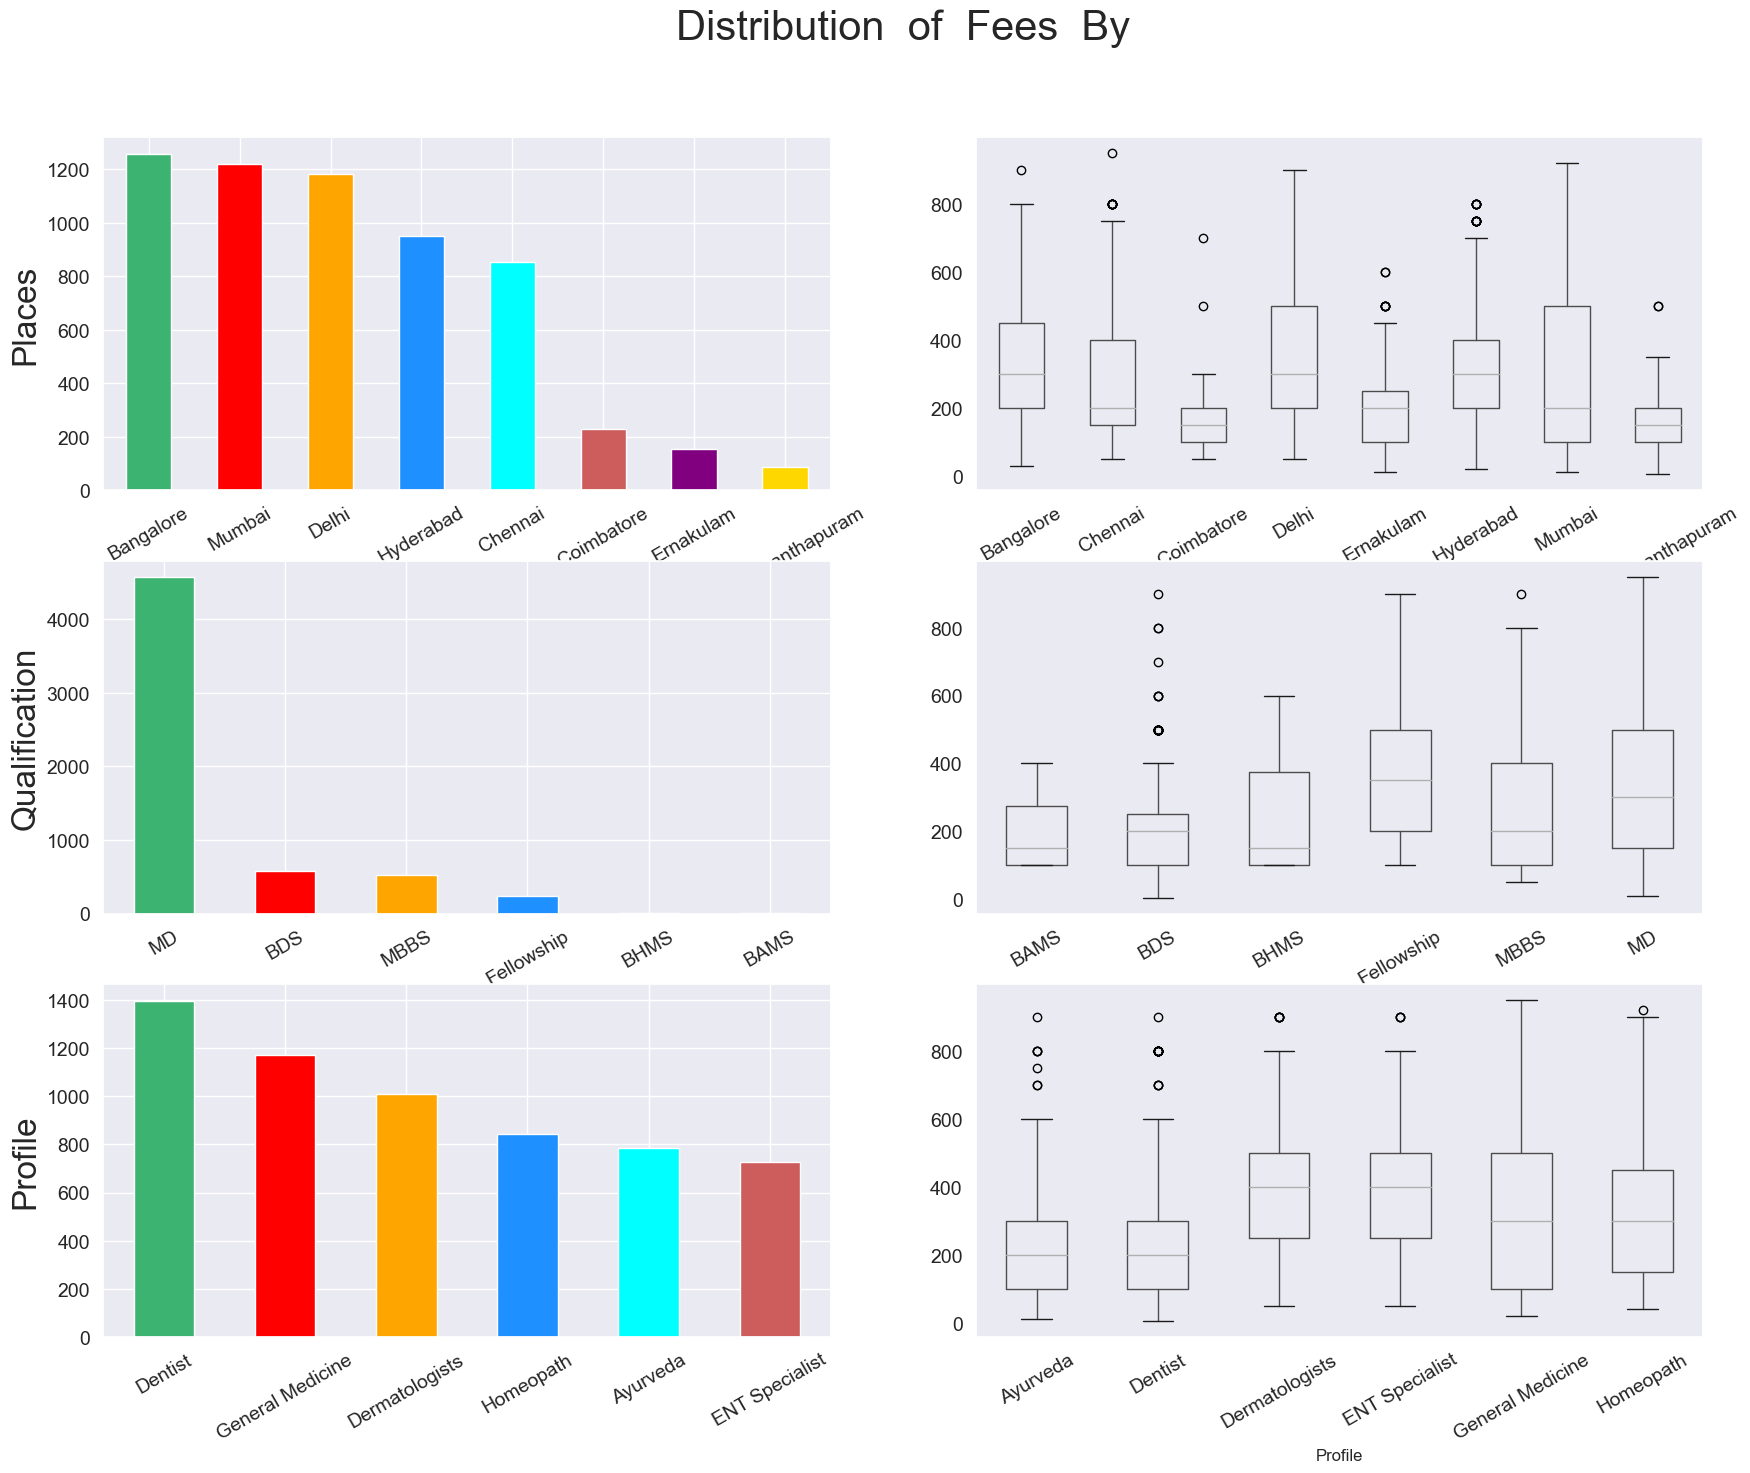

In [21]:
sns.set(context= "notebook", color_codes=True)
fig, ax=plt.subplots(nrows=3, ncols=2, dpi=100, figsize=(20,16))

train_data['Place'].value_counts().plot(kind='bar', color=['mediumseagreen', 'red', 'orange', 'dodgerblue',
                                                   'cyan', 'indianred','purple','gold'], ax=ax[0,0], rot=30)
ax[0,0].tick_params(axis='both', labelsize=14)

train_data.boxplot(by='Place', column= ['Fees'], ax=ax[0,1], grid = False, rot=30)
ax[0,1].tick_params(axis='both', labelsize=14)
ax[0,0].set_ylabel('Places', fontsize=24)
ax[0,1].set_title(' ')


train_data['Qualification'].value_counts().plot(kind='bar', color=['mediumseagreen', 'red', 'orange', 'dodgerblue',
                                                   'cyan', 'indianred','purple','gold'], ax=ax[1,0], rot=30)
ax[1,0].tick_params(axis='both', labelsize=14)

train_data.boxplot(by='Qualification', column= ['Fees'], ax=ax[1,1], grid = False, rot=30)
ax[1,1].tick_params(axis='both', labelsize=14)
ax[1,0].set_ylabel('Qualification', fontsize=24)
ax[1,1].set_title(' ')

train_data['Profile'].value_counts().plot(kind='bar', color=['mediumseagreen', 'red', 'orange', 'dodgerblue',
                                                   'cyan', 'indianred','purple','gold'], ax=ax[2,0], rot=30)
ax[2,0].tick_params(axis='both', labelsize=14)

train_data.boxplot(by='Profile', column= ['Fees'], ax=ax[2,1], grid = False, rot=30)
ax[2,1].tick_params(axis='both', labelsize=14)
ax[2,0].set_ylabel('Profile', fontsize=24)
ax[2,1].set_title(' ')

fig.suptitle('Distribution  of  Fees  By', fontsize=30)

plt.show()

+ The dataset contains data mostly of cities Bangalore, Mumbai and Delhi.
+ The 'Qualification' of doctors in the dataset is dominated by'MD' across various 'Profiles' of Dentists, General Medicine, Dermatologits, Homeopath, Ayurveda and ENT Specialists.

In [22]:
df=train_data

###### Preparing data for modelling

In [23]:
from sklearn.preprocessing import MinMaxScaler
X = df[['Qualification', 'Experience', 'Rating','Place', 'Profile']].copy()
y = df['Fees']

### Get dummies
X = pd.get_dummies(X,columns = ['Qualification', 'Place', 'Profile'],prefix=['Qualification', 'Place', 'Profile'])

### Standardise 'Experience' and 'Rating' column
mms = MinMaxScaler()
X[['Experience', 'Rating']] = mms.fit_transform(X[['Experience', 'Rating']])

### Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
X_train.shape


### Task Evaluation Score

def TaskScore(y_pred,y):
    val = np.sqrt(np.square(np.log10(y_pred+1) - np.log10(y+1)).mean())
    return (1 - val) 

##### Data Modelling
+ LINEAR REGRESSION

LinearRegression

On Training Data : 
Task Score :  0.7178501894062803
Mean Squared Error :  30201.819129213483

On Testing Data
Task Score : 0.7170427277031077
Mean Squared Error :  30401.8721361186


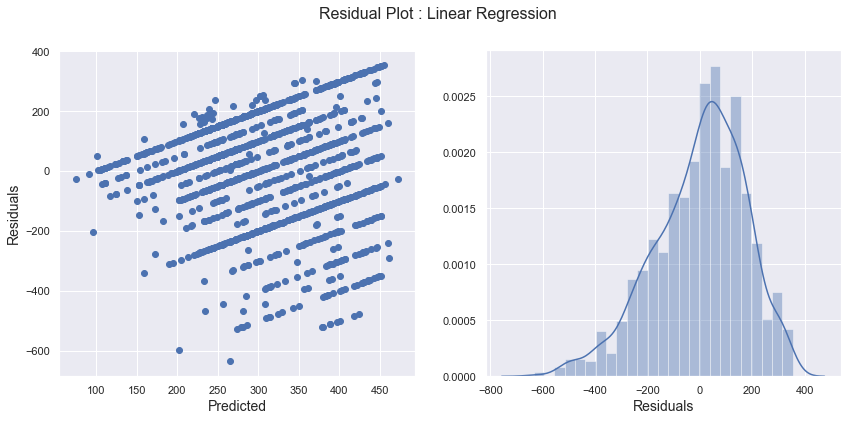

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#model fitting
lr=LinearRegression()
lr.fit(X_train, y_train)
#prediction and evaluation
print('LinearRegression\n')
print('On Training Data : ')
y_pred =lr.predict(X_train)
print('Task Score : ', TaskScore(y_pred,y_train))
print("Mean Squared Error : ", mean_squared_error(y_train,y_pred))

print('\nOn Testing Data')
y_pred = lr.predict(X_test)
print('Task Score :',TaskScore(y_pred,y_test))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (14,6))

ax[0].scatter(y_pred, (y_pred - y_test), c='b')
ax[0].set_xlabel('Predicted', fontsize=14)
ax[0].set_ylabel('Residuals', fontsize=14)
sns.distplot(y_pred - y_test, ax=ax[1])
ax[1].set_xlabel('Residuals', fontsize=14)
ax[1].set_ylabel(' ')
fig.suptitle('Residual Plot : Linear Regression', fontsize=16)

plt.show()

1. Elastic Net Regression With Default Parameters

ElasticNet Regression

On Training Data: 
Task Score : 0.7180845929526265
Mean Squared Error :  30161.146284350132

On Testing Data
Task Score : 0.7161855641919483
Mean Squared Error :  30557.294007836263


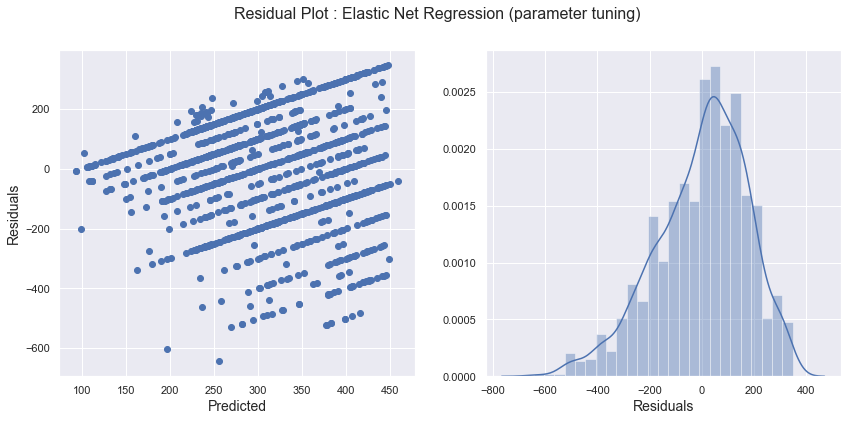

In [25]:
from sklearn.linear_model import ElasticNet
# Model Fitting
er = ElasticNet(alpha=0.01, l1_ratio=0.97)
er.fit(X_train, y_train)

# Prediction and Evaluation

print('ElasticNet Regression\n')
print('On Training Data: ')
y_pred = er.predict(X_train)
print('Task Score :', TaskScore(y_pred,y_train))
print("Mean Squared Error : ", mean_squared_error(y_train,y_pred))

print('\nOn Testing Data')
y_pred = er.predict(X_test)
print('Task Score :',TaskScore(y_pred,y_test))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (14,6))

ax[0].scatter(y_pred, (y_pred - y_test), c='b')
ax[0].set_xlabel('Predicted', fontsize=14)
ax[0].set_ylabel('Residuals', fontsize=14)
sns.distplot(y_pred - y_test, ax=ax[1])
ax[1].set_xlabel('Residuals', fontsize=14)
ax[1].set_ylabel(' ')
fig.suptitle('Residual Plot : Elastic Net Regression (parameter tuning)', fontsize=16)

plt.show()


2. Random Forest Regressor

RandomForest Regression

On Training Data: 
Task Score : 0.7763837289213502
Mean Squared Error :  18756.4360697389

On Testing Data
Task Score : 0.6959361597509737
Mean Squared Error :  37703.98794460552
Root Mean Squared Error: 194.17514759774363


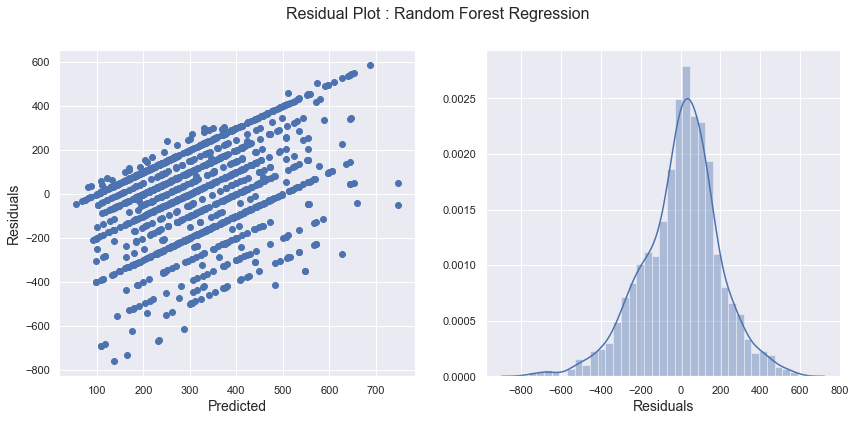

In [26]:
from sklearn.ensemble import RandomForestRegressor
# Model Fitting
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

# Prediction and Evaluation

print('RandomForest Regression\n')
print('On Training Data: ')
y_pred = rf.predict(X_train)
print('Task Score :', TaskScore(y_pred,y_train))
print("Mean Squared Error : ", mean_squared_error(y_train,y_pred))

print('\nOn Testing Data')
y_pred = rf.predict(X_test)
print('Task Score :',TaskScore(y_pred,y_test))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (14,6))

ax[0].scatter(y_pred, (y_pred - y_test), c='b')
ax[0].set_xlabel('Predicted', fontsize=14)
ax[0].set_ylabel('Residuals', fontsize=14)
sns.distplot(y_pred - y_test, ax=ax[1])
ax[1].set_xlabel('Residuals', fontsize=14)
ax[1].set_ylabel(' ')
fig.suptitle('Residual Plot : Random Forest Regression', fontsize=16)

plt.show()


3. Support Vector Regressor With Default Parameters

Support Vector Regression

On Training Data: 
Task Score : 0.7229701352822193
Mean Squared Error :  33257.56103164005

On Testing Data
Task Score : 0.721163682106567
Mean Squared Error :  33804.59075135272


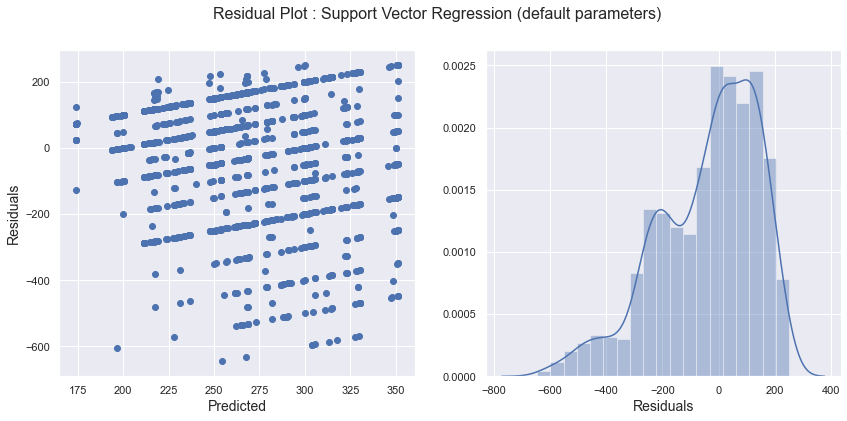

In [27]:
from sklearn.svm import SVR
# Model Fitting
sr = SVR()
sr.fit(X_train,y_train)

# Prediction and Evaluation

print('Support Vector Regression\n')
print('On Training Data: ')
y_pred = sr.predict(X_train)
print('Task Score :', TaskScore(y_pred,y_train))
print("Mean Squared Error : ", mean_squared_error(y_train,y_pred))

print('\nOn Testing Data')
y_pred = sr.predict(X_test)
print('Task Score :',TaskScore(y_pred,y_test))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (14,6))

ax[0].scatter(y_pred, (y_pred - y_test), c='b')
ax[0].set_xlabel('Predicted', fontsize=14)
ax[0].set_ylabel('Residuals', fontsize=14)
sns.distplot(y_pred - y_test, ax=ax[1])
ax[1].set_xlabel('Residuals', fontsize=14)
ax[1].set_ylabel(' ')
fig.suptitle('Residual Plot : Support Vector Regression (default parameters)', fontsize=16)

plt.show()

= Inferences from Residual plots:

+ For a perfect model, the scatter plot of residuals should not show any patterns and should have a normal distribution:
  + In Linear Regression, the distribution of residuals(diff(predicted, actual)) is a bit left skewed. 
  + Elastic Net Regression with default parameters shows errorneous dstribution of residuals. With particular values of alpha and l1_ratio, residuals of Elastic Net Regression shows near normal distribution.
  + Random Forest with default parameters shows normal distribution of residuals and hence the model can be considered. 
  + But the difference in MSE score between train and test data does not make the model preferable. 
  + There might be a problem of overfitting the train data by the model. 
  + Support Vector Regression with tuned parameters gives a better distribution of residuals rather than the default parameters. 
  
  + Hence the models to be reckoned are : 
 
= Linear Regression Elastic Net Regression with fitted parameters Support Vector Regression with fitted parameters.

= For this problem I choose Support Vector Regression Model with fitted parameters.

### Prediction on Test Data Set

In [28]:
df_test = pd.read_csv('Final_test.csv')
test=PreProcess(df_test)
dtest=test.drop(['Miscellaneous_Info'],axis=1)
dtest.head()


,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,91.312500,Mumbai,General Medicine
1,MD,31,88.882353,Hyderabad,ENT Specialist
2,MD,40,88.882353,Chennai,Dermatologists
3,MD,0,96.388430,Delhi,Ayurveda
4,MD,16,94.906061,Bangalore,Dentist


In [29]:
print('The Test Data has ', dtest.shape[0], 'rows and ', dtest.shape[1], 'columns')

The Test Data has  1981 rows and  5 columns


####  Preparing Prediction  Data for Modelling  of test dataset 

In [30]:
# Get dummies
df_test = pd.get_dummies(dtest,columns = ['Qualification', 'Place', 'Profile'],prefix=['Qualification', 'Place', 'Profile'])

# Standardise 'Experience' and 'Rating' column
mms = MinMaxScaler()
df_test[['Experience', 'Rating']] = mms.fit_transform(dtest[['Experience', 'Rating']])

# Support Vector Regression() 
# Prediction and Evaluation

Fees = np.round(sr.predict(df_test), 2)
Fees = pd.DataFrame(Fees)
Fees.columns = ['Fees']

In [31]:
import csv
Fees.to_csv('Doctor Fees.csv', index=None, columns=['Fees'])

THANK YOU